# Trainieren eines neuronalen Netzwerks zur Klassifikation

In [26]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

## Iris Datensatz

Der Iris Datensatz (siehe https://en.wikipedia.org/wiki/Iris_flower_data_set) enthält je 50 Beispiele für jede der drei Iris Blumen Arten (Iris setosa, Iris virginica and Iris versicolor). Gemessen wurden je die Breite und die Länge des Kelch- und Kronenblattes (Sepal and Petal). Auf Grundlage dieser Messung soll die Art der Blume bestimmt werden.

In [27]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_features = iris_dataset['data']
iris_targets = iris_dataset['target']
iris_target_names = iris_dataset['target_names']
iris_target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

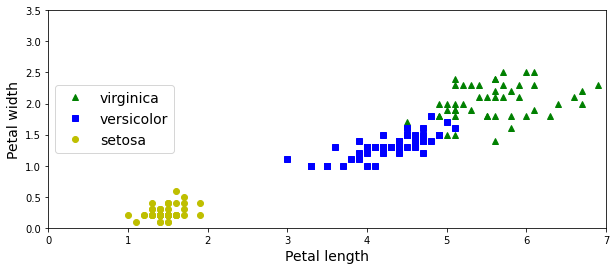

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(iris_features[iris_targets==2, 2], iris_features[iris_targets==2, 3], "g^", label=iris_target_names[2])
plt.plot(iris_features[iris_targets==1, 2], iris_features[iris_targets==1, 3], "bs", label=iris_target_names[1])
plt.plot(iris_features[iris_targets==0, 2], iris_features[iris_targets==0, 3], "yo", label=iris_target_names[0])

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

## Modell-Definition

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

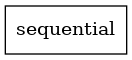

In [9]:
model = Sequential([
    Dense(4, activation='relu', dtype=tf.float64),
    Dense(3, activation='softmax', dtype=tf.float64) 
])

In [10]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    iris_features, 
    iris_targets, 
    epochs=20, 
    batch_size=2,
    validation_split=0.2
)

Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 1.1416 - accuracy: 0.4917 - val_loss: 1.1994 - val_accuracy: 0.0000e+00
Epoch 2/20
60/60 [==============================] - 0s 864us/step - loss: 0.7143 - accuracy: 0.8500 - val_loss: 1.1738 - val_accuracy: 0.0000e+00
Epoch 3/20
60/60 [==============================] - 0s 983us/step - loss: 0.5504 - accuracy: 0.8333 - val_loss: 0.8597 - val_accuracy: 0.0000e+00
Epoch 4/20
60/60 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8333 - val_loss: 0.9551 - val_accuracy: 0.0000e+00
Epoch 5/20
60/60 [==============================] - 0s 922us/step - loss: 0.4002 - accuracy: 0.8667 - val_loss: 0.8721 - val_accuracy: 0.0000e+00
Epoch 6/20
60/60 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8917 - val_loss: 0.9221 - val_accuracy: 0.0000e+00
Epoch 7/20
60/60 [==============================] - 0s 928us/step - loss: 0.3245 - accuracy: 0.8750 - val_loss: 0.9727 - val_accur

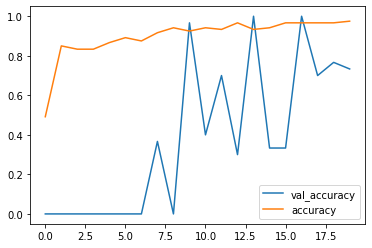

In [12]:
hist_df = pd.DataFrame(history.history)
plt.figure()
plt.plot(hist_df['val_accuracy'], label='val_accuracy')
plt.plot(hist_df['accuracy'], label='accuracy')
plt.legend()
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  20        
_________________________________________________________________
dense_1 (Dense)              multiple                  15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [14]:
# mit der predict Methode lässt sich das Modell verwenden um Vorhersagen zu machen
idx = 20
model.predict(iris_features[idx:idx+1])

array([[9.82610058e-01, 1.73897038e-02, 2.38626856e-07]])

In [15]:
# np.argmax lässt sich so die wahrscheinlichste Klasse auswählen:
np.argmax(model.predict(iris_features[idx:idx+1]))

0

In [16]:
idx = 120
print('Predicted label:', iris_target_names[np.argmax(model.predict(iris_features[idx:idx+1]))])
print('True label:', iris_target_names[iris_targets[idx]])

Predicted label: virginica
True label: virginica


# MNIST Datensatz

In [17]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Erster Blick auf die Datenstruktur

In [19]:
print('Training features shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)

print('Test features shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)
# Was beduetet die Struktur? Was ist 28x28?

Training features shape: (60000, 28, 28)
Training labels shape: (60000,)
Test features shape: (10000, 28, 28)
Test labels shape: (10000,)


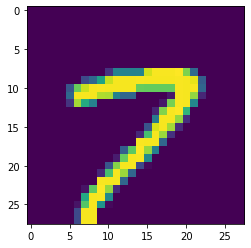

In [21]:
# Mit imshow kann man Bilder visualisieren mit matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(train_images[123])
plt.show()

In [22]:
train_images.dtype

dtype('uint8')

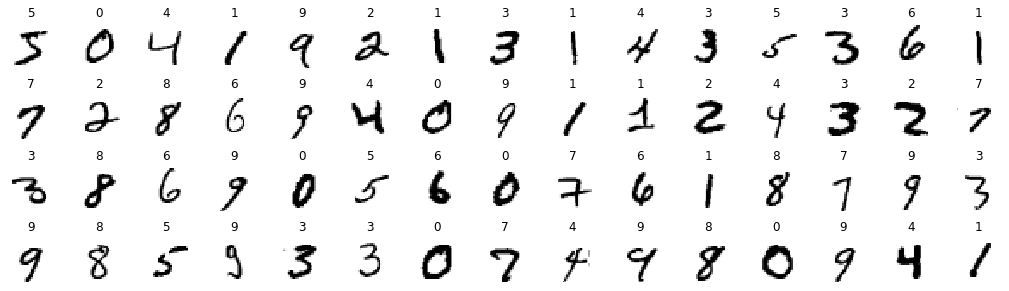

In [23]:
digit = train_images[0]

n_rows = 4
n_cols = 15
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(train_labels[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [24]:
# Vorbereitung der Daten:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Übung:

* Baue ein neuronales Netzwerk und trainiere es auf dem MNIST Datensatz
    * Definiere ein Modell mit Sequential
    * Füge Dense Layers mit entsprechenden Aktivierungsfunktionen hinzu
    * kompiliere das Modell
    * fitte das Modell
* Verändere Anzahl der hidden Layers, Neurone in den Layers, sowie andere Parameter wie learning rate
    * Was ist die höchste Accuracy auf dem Testdatensatz, die du erreichen kannst?

Hinweise: Mit 'model.evaluate(test_images, test_labels)' erhält man die Metriken, welche man beim kompilieren des Modells eingegeben hat ausgewertet auf dem Testdatensatz zurück. Noch besser ist es in der fit Methode den Test Datensatz via 'validation_data=(test_images, test_labels)' einzugeben.

Siehe auch: https://keras.io/api/models/model_training_apis/

# Übung 2:
* Betrachte den vorliegenden Datensatz
* Um was für Daten handelt es sich?
* Trainiere ein Modell auf dem Datensatz und Werte die Accuracy aus.

In [ ]:
from keras.datasets import cifar10
(train_data, train_target), (test_data,test_target) = cifar10.load_data()